## CESM1-LE 2011-2040 & 2071-2100 Cluster Analysis

**Author**: Sydney Crandall

**Last Revised**: August 9th, 2022

In [1]:
# imports
import pandas as pd
import seaborn as sb
import numpy as np
import cesm_cluster as cluster
import math
import datetime as dt
import cesm_visualizations as vis
from scipy.stats import iqr
import matplotlib.pyplot as plt
import datetime
import cesm_plot_and_extract as ext
import matplotlib as mpl

In [2]:
# read in DataFrames from production_2011_2040 and production_2071-2100
fdf = pd.read_csv('/glade/work/scrandall/cluster_data_2071_2100.csv')
pdf = pd.read_csv('/glade/work/scrandall/cluster_data_2011_2040.csv')

In [3]:
# 2071-2100
#fdf

In [4]:
# 2011-2040
#pdf

In [5]:
# select each location into its own DataFrame

felp = fdf.query('lat < 32').reset_index()
falb = fdf.query('lat >32 and lat < 36').reset_index()
ftrd = fdf.query('lat > 36 and lat < 38').reset_index()
fbou = fdf.query('lat >39 and lat < 41').reset_index()
fcas = fdf.query('lat > 41 and lat < 43').reset_index()
fbil = fdf.query('lat > 43 and lat < 46').reset_index()
fgls = fdf.query('lat > 46').reset_index()

# select each location into its own DataFrame

pelp = pdf.query('lat < 32').reset_index()
palb = pdf.query('lat >32 and lat < 36').reset_index()
ptrd = pdf.query('lat > 36 and lat < 38').reset_index()
pbou = pdf.query('lat >39 and lat < 41').reset_index()
pcas = pdf.query('lat > 41 and lat < 43').reset_index()
pbil = pdf.query('lat > 43 and lat < 46').reset_index()
pgls = pdf.query('lat > 46').reset_index()

In [6]:
# change the time variable to a datetime object

felp['datetime'] = pd.to_datetime(felp['time'])
falb['datetime'] = pd.to_datetime(falb['time'])
ftrd['datetime'] = pd.to_datetime(ftrd['time'])
fbou['datetime'] = pd.to_datetime(fbou['time'])
fcas['datetime'] = pd.to_datetime(fcas['time'])
fbil['datetime'] = pd.to_datetime(fbil['time'])
fgls['datetime'] = pd.to_datetime(fgls['time'])


pelp['datetime'] = pd.to_datetime(pelp['time'])
palb['datetime'] = pd.to_datetime(palb['time'])
ptrd['datetime'] = pd.to_datetime(ptrd['time'])
pbou['datetime'] = pd.to_datetime(pbou['time'])
pcas['datetime'] = pd.to_datetime(pcas['time'])
pbil['datetime'] = pd.to_datetime(pbil['time'])
pgls['datetime'] = pd.to_datetime(pgls['time'])

In [7]:
# features to cluster and number of clusters
numClusters = 3
included_cols = ['FSNS_W/m2', 'PRECL_mm_day', 'PRECT_mm_day', 'PSL_hPa', 'QBOT_kg/kg',
       'TMQ_kg/m2', 'TREFHT_deg_C', 'TREFHTMN_deg_C', 'TREFHTMX_deg_C',
       'UBOT_mph', 'VBOT_mph', 'WSPDSRFAV_mph', 'WSPDSRFMX_mph',
       'RH_calculated_%', 'TRANGE_deg_C', 'WDIR_degrees', 'WSPD_mph']

In [8]:
# cluster fdata

felpData, felpScaledData = cluster.scale_and_convert_to_numpy(felp, included_cols)
felpScaledCentroids, felpIdx = cluster.cluster_data(numClusters, felpScaledData)
felpCentroids = cluster.get_centroids(felpScaledCentroids, included_cols, felpData)

falbData, falbScaledData = cluster.scale_and_convert_to_numpy(falb, included_cols)
falbScaledCentroids, falbIdx = cluster.cluster_data(numClusters, falbScaledData)
falbCentroids = cluster.get_centroids(falbScaledCentroids, included_cols, falbData)

ftrdData, ftrdScaledData = cluster.scale_and_convert_to_numpy(ftrd, included_cols)
ftrdScaledCentroids, ftrdIdx = cluster.cluster_data(numClusters, ftrdScaledData)
ftrdCentroids = cluster.get_centroids(ftrdScaledCentroids, included_cols, ftrdData)

fbouData, fbouScaledData = cluster.scale_and_convert_to_numpy(fbou, included_cols)
fbouScaledCentroids, fbouIdx = cluster.cluster_data(numClusters, fbouScaledData)
fbouCentroids = cluster.get_centroids(fbouScaledCentroids, included_cols, fbouData)

fcasData, fcasScaledData = cluster.scale_and_convert_to_numpy(fcas, included_cols)
fcasScaledCentroids, fcasIdx = cluster.cluster_data(numClusters, fcasScaledData)
fcasCentroids = cluster.get_centroids(fcasScaledCentroids, included_cols, fcasData)

fbilData, fbilScaledData = cluster.scale_and_convert_to_numpy(fbil, included_cols)
fbilScaledCentroids, fbilIdx = cluster.cluster_data(numClusters, fbilScaledData)
fbilCentroids = cluster.get_centroids(fbilScaledCentroids, included_cols, fbilData)

fglsData, fglsScaledData = cluster.scale_and_convert_to_numpy(fgls, included_cols)
fglsScaledCentroids, fglsIdx = cluster.cluster_data(numClusters, fglsScaledData)
fglsCentroids = cluster.get_centroids(fglsScaledCentroids, included_cols, fglsData)

In [9]:
# cluster pdata

pelpData, pelpScaledData = cluster.scale_and_convert_to_numpy(pelp, included_cols)
pelpScaledCentroids, pelpIdx = cluster.cluster_data(numClusters, pelpScaledData)
pelpCentroids = cluster.get_centroids(pelpScaledCentroids, included_cols, pelpData)

palbData, palbScaledData = cluster.scale_and_convert_to_numpy(palb, included_cols)
palbScaledCentroids, palbIdx = cluster.cluster_data(numClusters, palbScaledData)
palbCentroids = cluster.get_centroids(palbScaledCentroids, included_cols, palbData)

ptrdData, ptrdScaledData = cluster.scale_and_convert_to_numpy(ptrd, included_cols)
ptrdScaledCentroids, ptrdIdx = cluster.cluster_data(numClusters, ptrdScaledData)
ptrdCentroids = cluster.get_centroids(ptrdScaledCentroids, included_cols, ptrdData)

pbouData, pbouScaledData = cluster.scale_and_convert_to_numpy(pbou, included_cols)
pbouScaledCentroids, pbouIdx = cluster.cluster_data(numClusters, pbouScaledData)
pbouCentroids = cluster.get_centroids(pbouScaledCentroids, included_cols, pbouData)

pcasData, pcasScaledData = cluster.scale_and_convert_to_numpy(pcas, included_cols)
pcasScaledCentroids, pcasIdx = cluster.cluster_data(numClusters, pcasScaledData)
pcasCentroids = cluster.get_centroids(pcasScaledCentroids, included_cols, pcasData)

pbilData, pbilScaledData = cluster.scale_and_convert_to_numpy(pbil, included_cols)
pbilScaledCentroids, pbilIdx = cluster.cluster_data(numClusters, pbilScaledData)
pbilCentroids = cluster.get_centroids(pbilScaledCentroids, included_cols, pbilData)

pglsData, pglsScaledData = cluster.scale_and_convert_to_numpy(pgls, included_cols)
pglsScaledCentroids, pglsIdx = cluster.cluster_data(numClusters, pglsScaledData)
pglsCentroids = cluster.get_centroids(pglsScaledCentroids, included_cols, pglsData)

In [10]:
fcentroidsList = [felpCentroids, falbCentroids, ftrdCentroids, fbouCentroids, fcasCentroids, fbilCentroids, fglsCentroids]
pcentroidsList = [pelpCentroids, palbCentroids, ptrdCentroids, pbouCentroids, pcasCentroids, pbilCentroids, pglsCentroids]

In [11]:
# add latitude and locations to each centroid DataFrame, then concatinate (from south to north)

latitudeList = [felp['lat'][0],falb['lat'][0],ftrd['lat'][0],fbou['lat'][0],fcas['lat'][0],fbil['lat'][0],fgls['lat'][0]]
locationList = ['elp','alb','trd','bou','cas','bil','gls']

for i in range(0,7):
    fcentroidsList[i]['location'] = locationList[i]
    fcentroidsList[i]['latitude'] = latitudeList[i]

for i in range(0,7):
    pcentroidsList[i]['location'] = locationList[i]
    pcentroidsList[i]['latitude'] = latitudeList[i]

In [12]:
# add informed_cluster to DataFrames based on cluster temperature (TREFHTMX) and precipitation

# this step needs to be checked/revised every time the program is run to ensure labeling is correct


fcentroidsList = [felpCentroids, falbCentroids, ftrdCentroids, fbouCentroids, fcasCentroids, fbilCentroids, fglsCentroids]
pcentroidsList = [pelpCentroids, palbCentroids, ptrdCentroids, pbouCentroids, pcasCentroids, pbilCentroids, pglsCentroids]

for i in range(0,7):
    if i == 0 or i == 1 or i == 2 or i == 3 or i == 4: #(elp, alb, trd, cas)
        fcentroidsList[i]['informed_cluster'] = 'High temp + dry'
        fcentroidsList[i]['informed_cluster'].loc[(fcentroidsList[i]['TREFHTMX_deg_C'].idxmax()) & (fcentroidsList[i]['PRECT_mm_day'].idxmax())] = 'High temp + wet'
        fcentroidsList[i]['informed_cluster'].loc[(fcentroidsList[i]['TREFHTMX_deg_C'].idxmin())] = 'Low temp'
    else: # i = 5, i = 6 (bil, gls)
        fcentroidsList[i]['informed_cluster'] = 'Low temp + dry'
        fcentroidsList[i]['informed_cluster'].loc[(fcentroidsList[i]['TREFHTMX_deg_C'].idxmax())] = 'High temp'
        fcentroidsList[i]['informed_cluster'].loc[(fcentroidsList[i]['TREFHTMX_deg_C'].idxmin()) & (fcentroidsList[i]['PRECT_mm_day'].idxmax())] = 'Low temp + wet'

for i in range(0,7):
    if i == 0 or i == 1 or i ==2 or i == 3 or i ==4:
        pcentroidsList[i]['informed_cluster'] = 'High temp + dry'
        pcentroidsList[i]['informed_cluster'].loc[(pcentroidsList[i]['TREFHTMX_deg_C'].idxmax()) & (pcentroidsList[i]['PRECT_mm_day'].idxmax())] = 'High temp + wet'
        pcentroidsList[i]['informed_cluster'].loc[(pcentroidsList[i]['TREFHTMX_deg_C'].idxmin())] = 'Low temp'
    else:
        pcentroidsList[i]['informed_cluster'] = 'Low temp + dry'
        pcentroidsList[i]['informed_cluster'].loc[(pcentroidsList[i]['TREFHTMX_deg_C'].idxmax())] = 'High temp'
        pcentroidsList[i]['informed_cluster'].loc[(pcentroidsList[i]['TREFHTMX_deg_C'].idxmin()) & (pcentroidsList[i]['PRECT_mm_day'].idxmax())] = 'Low temp + wet'
    
# special case for fbouCentroids
fbouCentroids['informed_cluster'].loc[(fbouCentroids['PRECT_mm_day'].idxmax())] = 'High temp + wet'
fbouCentroids['informed_cluster'].loc[(fbouCentroids['TREFHTMX_deg_C'].idxmax())] = 'High temp + dry'
# special case for fglsCentroids
fglsCentroids['informed_cluster'] = 'Low temp + wet'
fglsCentroids['informed_cluster'].loc[(fglsCentroids['PRECT_mm_day'].idxmin())] = 'Low temp + dry'
fglsCentroids['informed_cluster'].loc[(fglsCentroids['TREFHTMX_deg_C'].idxmax())] = 'High temp'
# special case for fcasCentroids
fcasCentroids['informed_cluster'].loc[(fcasCentroids['PRECT_mm_day'].idxmax())] = 'High temp + wet'
fcasCentroids['informed_cluster'].loc[(fcasCentroids['PRECT_mm_day'].idxmin())] = 'High temp + dry'
# special case for pbilCentroids
pbilCentroids['informed_cluster'] = 'Low temp + wet'
pbilCentroids['informed_cluster'].loc[(pbilCentroids['TREFHTMX_deg_C'].idxmax())] = 'High temp'
pbilCentroids['informed_cluster'].loc[(pbilCentroids['TREFHTMX_deg_C'].idxmin())] = 'Low temp + dry'
# special case for palbCentroids
palbCentroids['informed_cluster'] = 'Low temp'
palbCentroids['informed_cluster'].loc[(palbCentroids['PRECT_mm_day'].idxmax())] = 'High temp + wet'
palbCentroids['informed_cluster'].loc[(palbCentroids['PRECT_mm_day'].idxmin())] = 'High temp + dry'
# special case for pglsCentroids
pglsCentroids['informed_cluster'] = 'Low temp + wet'
pglsCentroids['informed_cluster'].loc[(pglsCentroids['TREFHTMX_deg_C'].idxmax())] = 'High temp'
pglsCentroids['informed_cluster'].loc[(pglsCentroids['TREFHTMX_deg_C'].idxmin())] = 'Low temp + dry'

fallCentroids = pd.concat(fcentroidsList, axis = 0).reset_index(drop = True)
pallCentroids = pd.concat(pcentroidsList, axis = 0).reset_index(drop = True)

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
pcentroidsList[1][['location','informed_cluster','TREFHTMX_deg_C','PRECT_mm_day']]

,location,informed_cluster,TREFHTMX_deg_C,PRECT_mm_day
0,alb,High temp + wet,23.075567,5.190898
1,alb,High temp + dry,23.868333,0.512362
2,alb,Low temp,8.030812,1.326465


In [14]:
# add cluster index, location, latitude, and informed_cluster to DataFrames

fdfList = [felp,falb,ftrd,fbou,fcas,fbil,fgls]
findexList = [felpIdx,falbIdx,ftrdIdx,fbouIdx,fcasIdx,fbilIdx,fglsIdx]

for i in range(0,len(findexList)):
    fdfList[i]['cluster'] = findexList[i]
    fdfList[i]['location'] = locationList[i]
    fdfList[i]['latitude'] = latitudeList[i]

# add informed_cluster (from centroids) to DataFrames
for i in range(0,len(fcentroidsList)):
    fdfList[i]['informed_cluster'] = fdfList[i]['cluster'].map(fcentroidsList[i].set_index(fcentroidsList[i]['cluster'])['informed_cluster'])
    
# concatinate the DataFrames, from south to north
falldf = pd.concat(fdfList, axis = 0, ignore_index = True)


pdfList = [pelp,palb,ptrd,pbou,pcas,pbil,pgls]
pindexList = [pelpIdx,palbIdx,ptrdIdx,pbouIdx,pcasIdx,pbilIdx,pglsIdx]

for i in range(0,len(pindexList)):
    pdfList[i]['cluster'] = pindexList[i]
    pdfList[i]['location'] = locationList[i]
    pdfList[i]['latitude'] = latitudeList[i]

# add informed_cluster (from centroids) to DataFrames
for i in range(0,len(pcentroidsList)):
    pdfList[i]['informed_cluster'] = pdfList[i]['cluster'].map(pcentroidsList[i].set_index(pcentroidsList[i]['cluster'])['informed_cluster'])
    
# concatinate the DataFrames, from south to north
palldf = pd.concat(pdfList, axis = 0, ignore_index = True)

In [15]:
# construct a DataFrame for the feature means at each location

fmeans = pd.DataFrame()

# add latitude (south to north)
fmeans['latitude'] = latitudeList

# add the mean of each feature (included_cols) for each location to the DataFrame
for i in range(0,len(included_cols)):
    fmeans[included_cols[i]] = [felp[included_cols[i]].mean(),falb[included_cols[i]].mean(),ftrd[included_cols[i]].mean(),
                               fbou[included_cols[i]].mean(),fcas[included_cols[i]].mean(),fbil[included_cols[i]].mean(),
                               fgls[included_cols[i]].mean()]
    
# construct a DataFrame for the feature means at each location

pmeans = pd.DataFrame()

# add latitude (south to north)
pmeans['latitude'] = latitudeList

# add the mean of each feature (included_cols) for each location to the DataFrame
for i in range(0,len(included_cols)):
    pmeans[included_cols[i]] = [pelp[included_cols[i]].mean(),palb[included_cols[i]].mean(),ptrd[included_cols[i]].mean(),
                               pbou[included_cols[i]].mean(),pcas[included_cols[i]].mean(),pbil[included_cols[i]].mean(),
                               pgls[included_cols[i]].mean()]

In [16]:
# add a column to allCentroids for the number of days in each cluster (count)

fcount = []
fallGroups = falldf.groupby(['cluster','location'])

for i in range(0,len(locationList)):
    for k in range(1,4):
        fcount.append(len(fallGroups.get_group((k,locationList[i]))))

fallCentroids['count'] = fcount


pcount = []
pallGroups = palldf.groupby(['cluster','location'])

for i in range(0,len(locationList)):
    for k in range(1,4):
        pcount.append(len(pallGroups.get_group((k,locationList[i]))))

pallCentroids['count'] = pcount

In [17]:
fgroups = [('gls', 'Low temp + dry'), ('gls','Low temp + wet'),('gls','High temp'),('bil','Low temp + dry'),('bil','Low temp + wet'),
         ('bil','High temp'),('cas','Low temp'),('cas','High temp + wet'),('cas',"High temp + dry"),('bou','Low temp'),
         ('bou','High temp + wet'),('bou','High temp + dry'),('trd','Low temp'),('trd','High temp + wet'),('trd','High temp + dry'),
         ('alb', 'High temp + wet'),('alb',"High temp + dry"), ('alb','Low temp'),('elp','High temp + wet'),('elp','High temp + dry'),
         ('elp','Low temp')]

pgroups = [('gls', 'High temp'), ('gls','Low temp + wet'),('gls','Low temp + dry'),('bil','Low temp + dry'),('bil','Low temp + wet'),
         ('bil','High temp'),('cas','Low temp'),('cas','High temp + wet'),('cas',"High temp + dry"),('bou','Low temp'),
         ('bou','High temp + wet'),('bou','High temp + dry'),('trd','Low temp'),('trd','High temp + wet'),('trd','High temp + dry'),
         ('alb', 'High temp + wet'),('alb',"High temp + dry"), ('alb','Low temp'),('elp','High temp + wet'),('elp','High temp + dry'),
         ('elp','Low temp')]

falldfGroups = falldf.groupby(["location", 'informed_cluster'])
palldfGroups = palldf.groupby(['location','informed_cluster'])

cluster_label_list = ['Cluster 1','Cluster 2','Cluster 3']

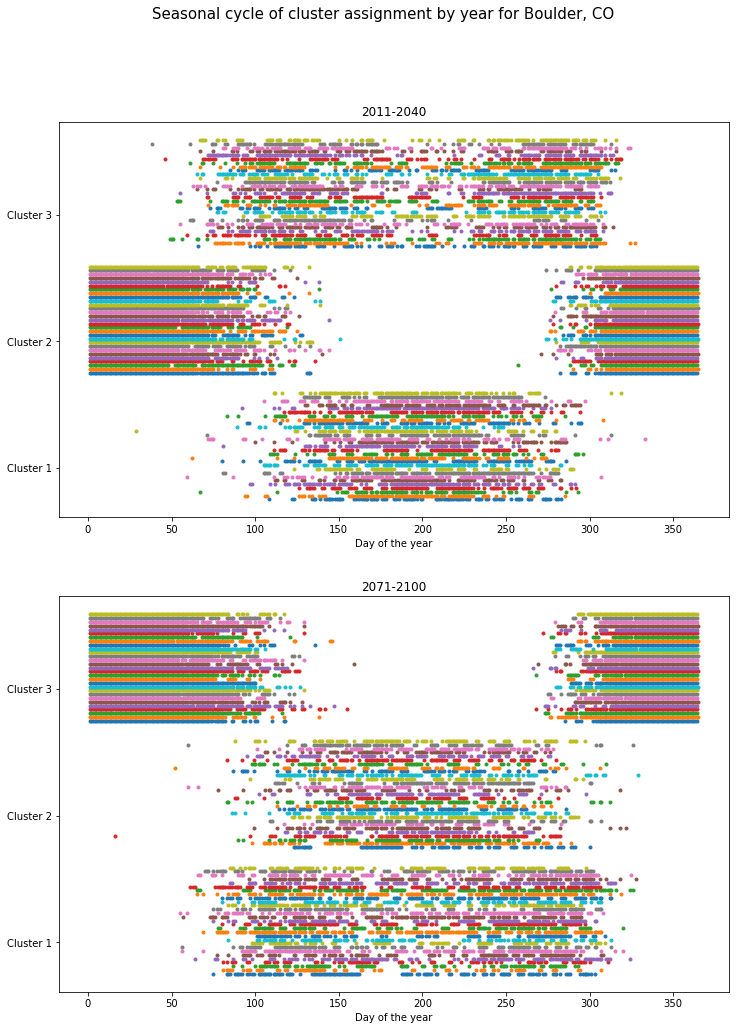

In [18]:
vis.seasonal_assignment_by_year_compare(pbou, 2011, 2040, pbouIdx, fbou, 2071, 2100, fbouIdx, numClusters, 'Boulder, CO', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/boulder_seasonal_compare.jpg') 

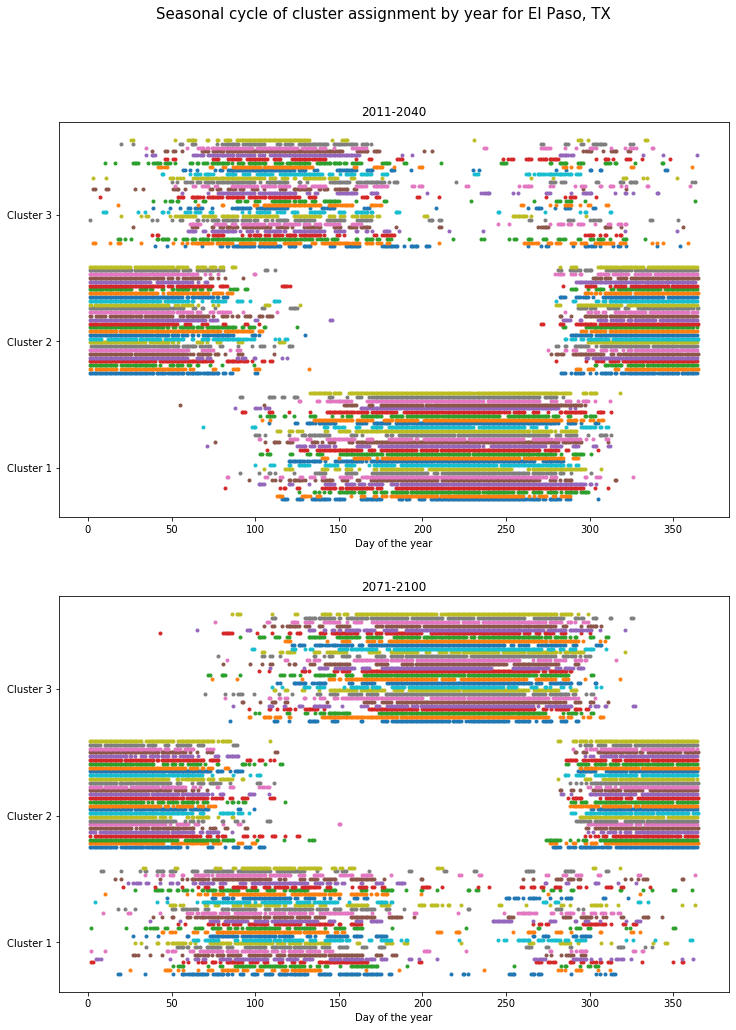

In [19]:
vis.seasonal_assignment_by_year_compare(pelp, 2011, 2040, pelpIdx, felp, 2071, 2100, felpIdx, numClusters, 'El Paso, TX', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/el_paso_seasonal_compare.jpg') 

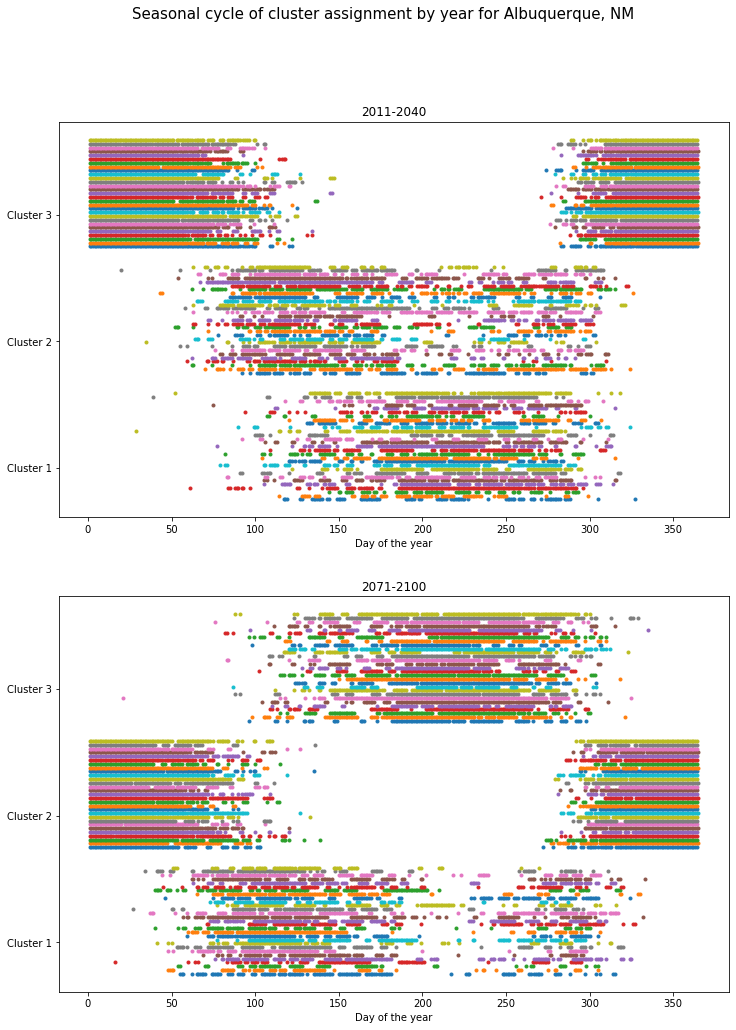

In [20]:
vis.seasonal_assignment_by_year_compare(palb, 2011, 2040, palbIdx, falb, 2071, 2100, falbIdx, numClusters, 'Albuquerque, NM', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/albuquerque_seasonal_compare.jpg') 

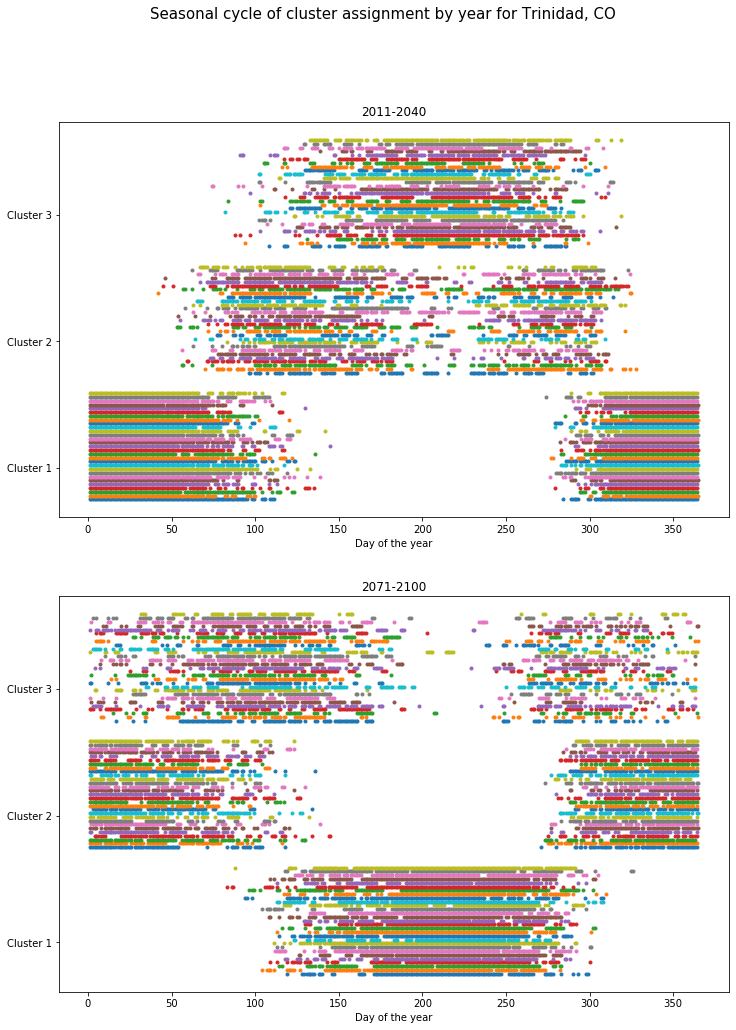

In [21]:
vis.seasonal_assignment_by_year_compare(ptrd, 2011, 2040, ptrdIdx, ftrd, 2071, 2100, ftrdIdx, numClusters, 'Trinidad, CO', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/trinidad_seasonal_compare.jpg') 

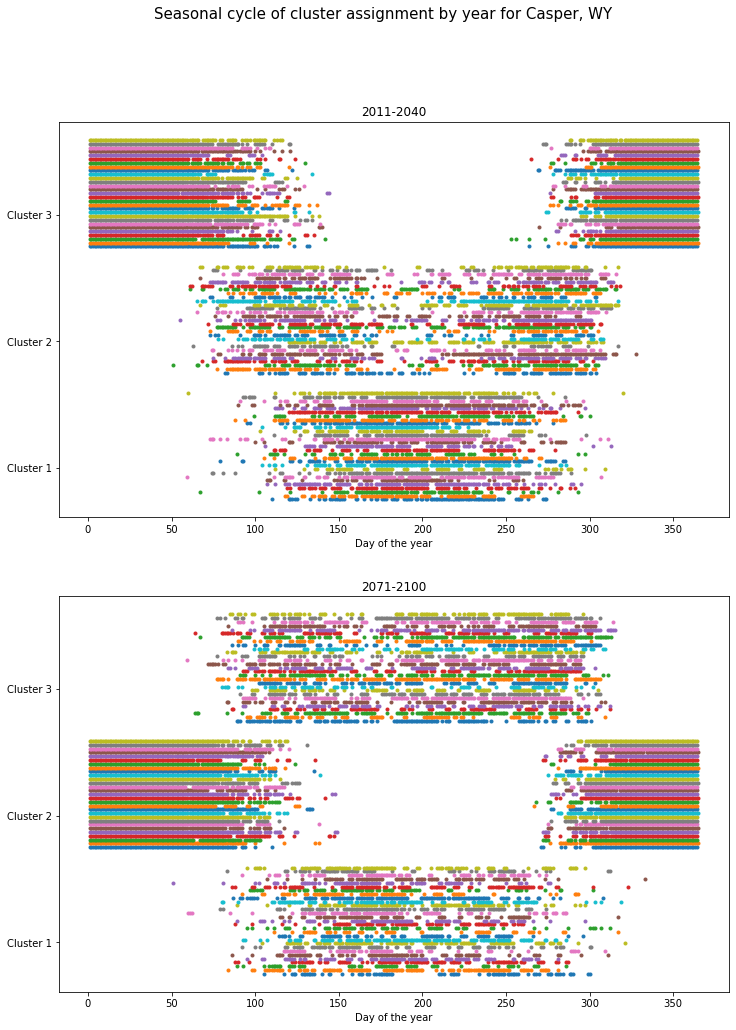

In [22]:
vis.seasonal_assignment_by_year_compare(pcas, 2011, 2040, pcasIdx, fcas, 2071, 2100, fcasIdx, numClusters, 'Casper, WY', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/casper_seasonal_compare.jpg') 

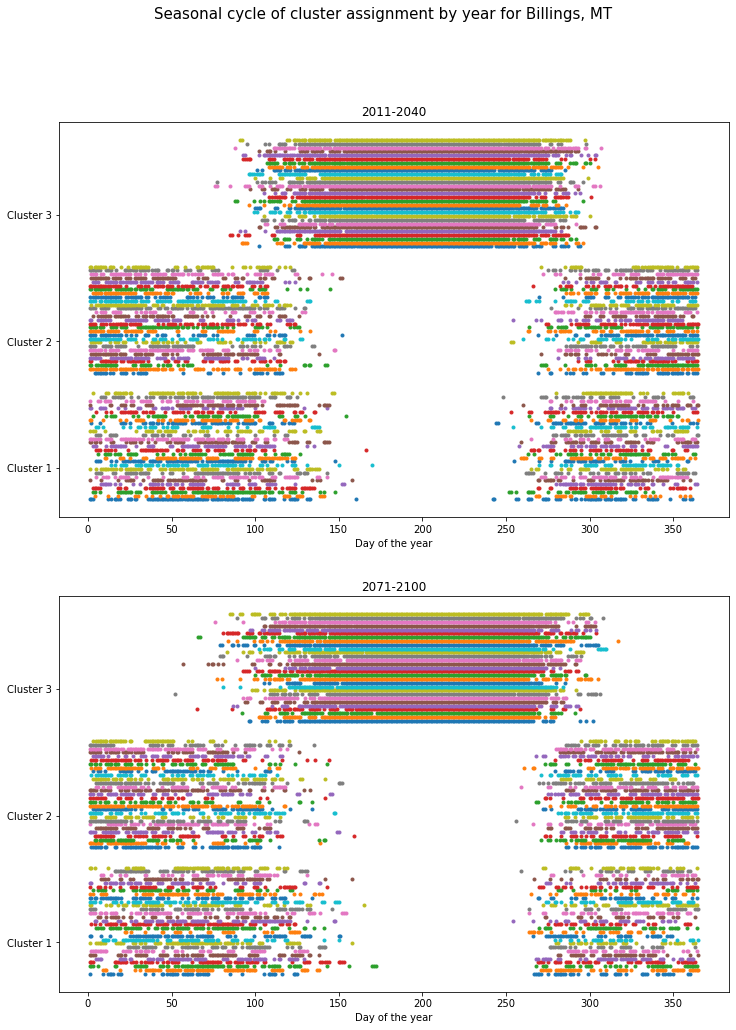

In [23]:
vis.seasonal_assignment_by_year_compare(pbil, 2011, 2040, pbilIdx, fbil, 2071, 2100, fbilIdx, numClusters, 'Billings, MT', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/billings_seasonal_compare.jpg') 

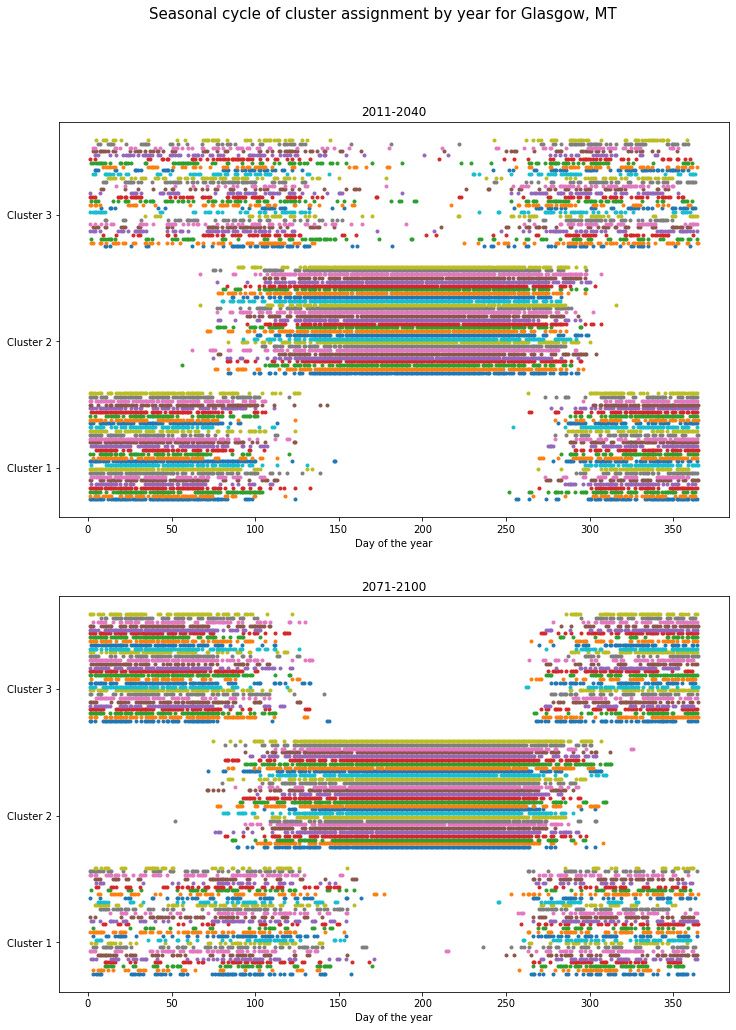

In [24]:
vis.seasonal_assignment_by_year_compare(pgls, 2011, 2040, pglsIdx, fgls, 2071, 2100, fglsIdx, numClusters, 'Glasgow, MT', cluster_label_list, save = True,
                                        figname = '/glade/u/home/scrandall/production_cluster_plots/glasgow_seasonal_compare.jpg') 

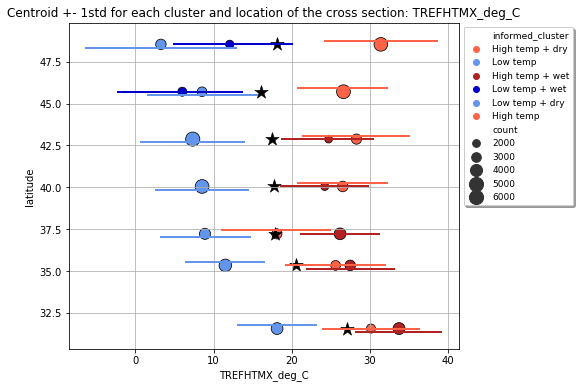

In [25]:
vis.variable_location_scatter('TREFHTMX_deg_C', fallCentroids, fmeans, fgroups, falldfGroups)

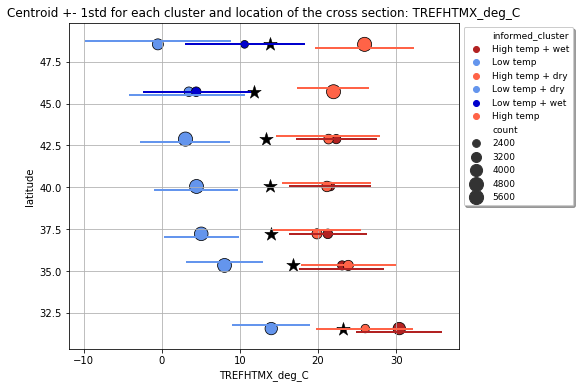

In [26]:
vis.variable_location_scatter('TREFHTMX_deg_C',pallCentroids, pmeans, pgroups, palldfGroups)

### visual_location_scatter_compare
This plot shows the value of each centroid for each location for the given variable. Colors represent the categorical classification of the centroids, which fall into one of the following categories: High temp, Low temp, High temp + wet, High temp + dry, Low temp + wet, Low temp + dry. The unfilled points represent the centroids derived from CESM-LE data between 2011-2040, whereas the filled points represent CESM-LE data between 2071-2100. Stars show the mean value of the variable over all clusters for the given location, and follow the same convention as the points for data range.

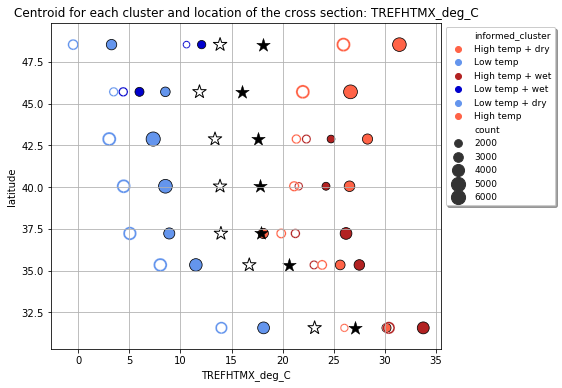

In [27]:
vis.variable_location_scatter_compare('TREFHTMX_deg_C', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/TREFHTMX_compare.jpg')

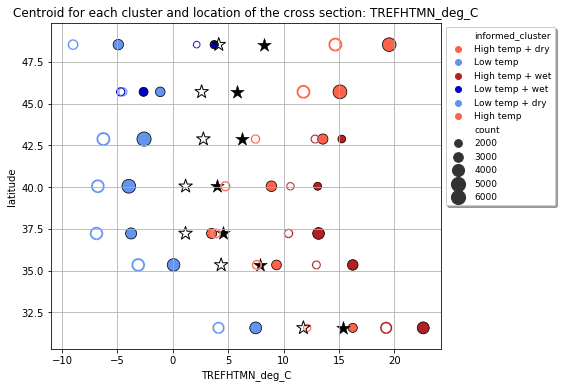

In [28]:
vis.variable_location_scatter_compare('TREFHTMN_deg_C', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/TREFHTMN_compare.jpg')

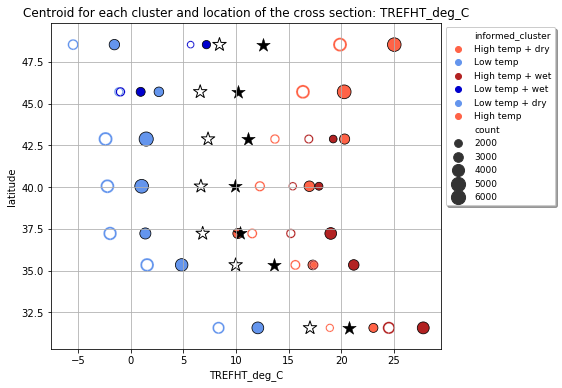

In [29]:
vis.variable_location_scatter_compare('TREFHT_deg_C', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/TREFHT_compare.jpg')

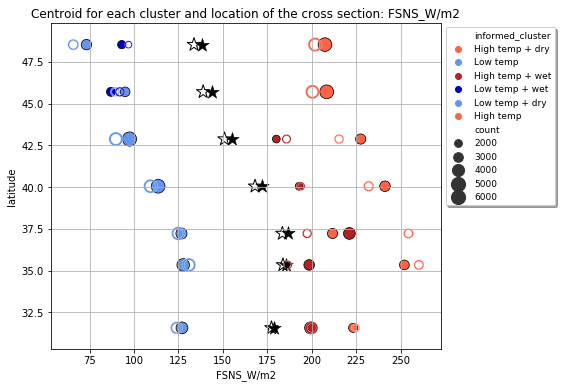

In [30]:
vis.variable_location_scatter_compare('FSNS_W/m2', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/FSNS_compare.jpg')

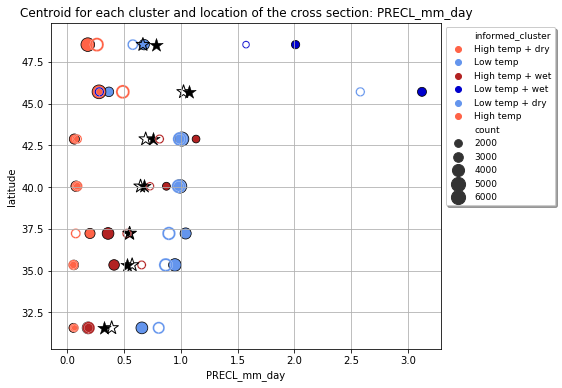

In [31]:
vis.variable_location_scatter_compare('PRECL_mm_day', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/PRECL_compare.jpg')

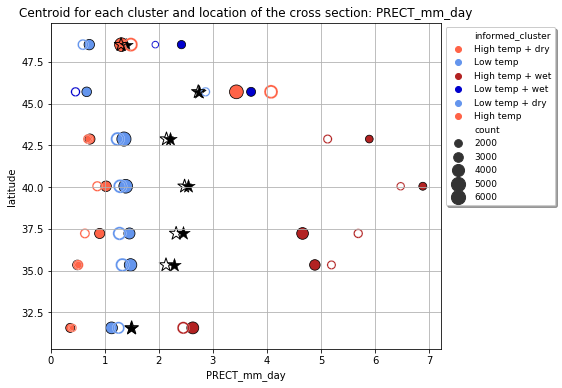

In [32]:
vis.variable_location_scatter_compare('PRECT_mm_day', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/PRECT_compare.jpg')

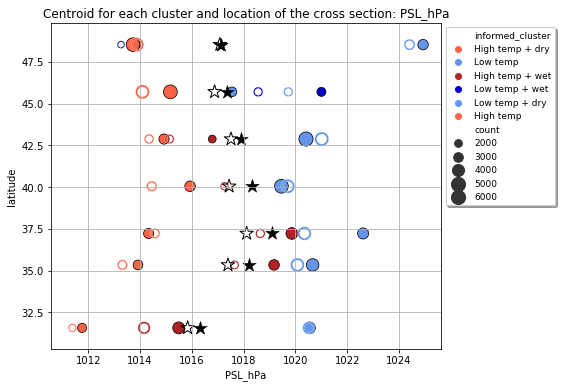

In [33]:
vis.variable_location_scatter_compare('PSL_hPa', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/PSL_compare.jpg')

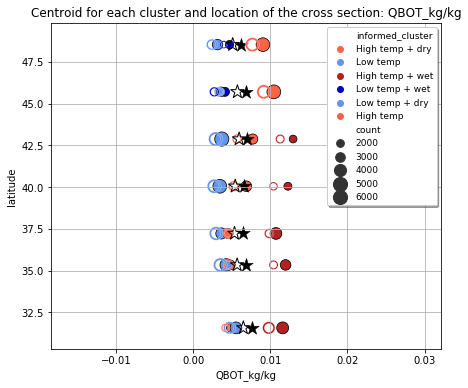

In [34]:
vis.variable_location_scatter_compare('QBOT_kg/kg', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/QBOT_compare.jpg')

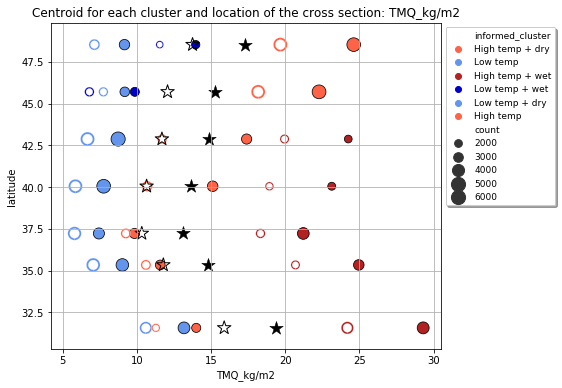

In [35]:
vis.variable_location_scatter_compare('TMQ_kg/m2', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/TMQ_compare.jpg')

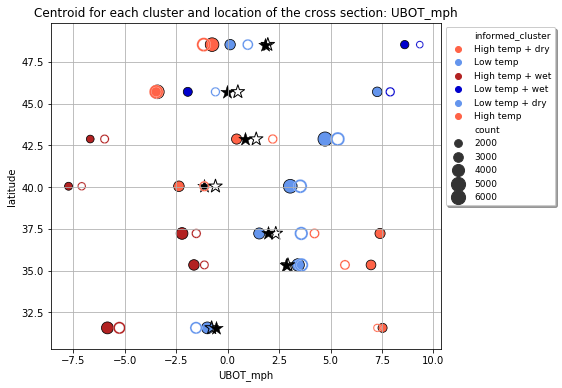

In [36]:
vis.variable_location_scatter_compare('UBOT_mph', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/UBOT_compare.jpg')

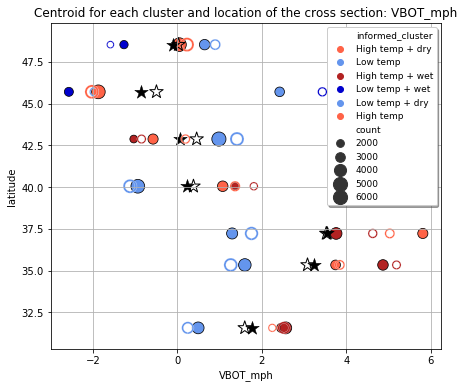

In [37]:
vis.variable_location_scatter_compare('VBOT_mph', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/VBOT_compare.jpg')

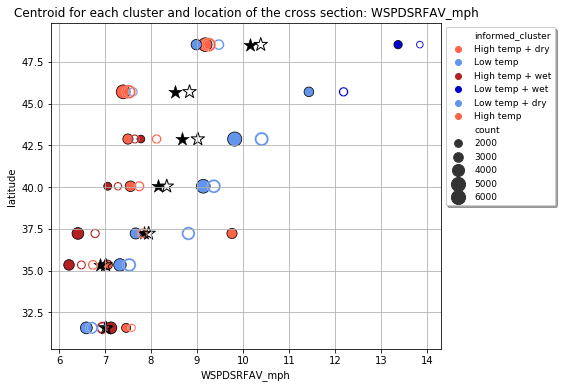

In [38]:
vis.variable_location_scatter_compare('WSPDSRFAV_mph', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/WSPDSRFAV_compare.jpg')

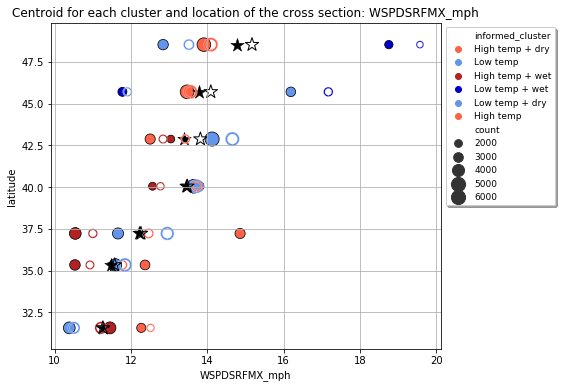

In [39]:
vis.variable_location_scatter_compare('WSPDSRFMX_mph', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/WSPDSRFMX_compare.jpg')

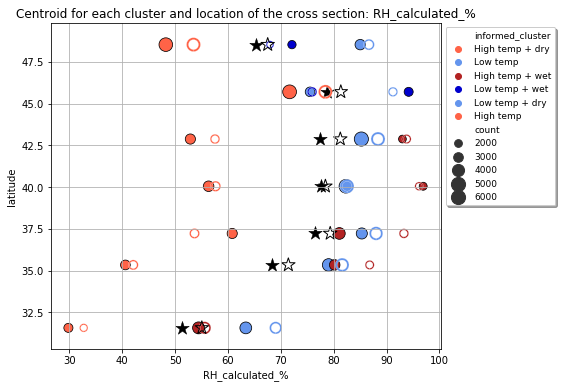

In [40]:
vis.variable_location_scatter_compare('RH_calculated_%', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/RH_calculated_compare.jpg')

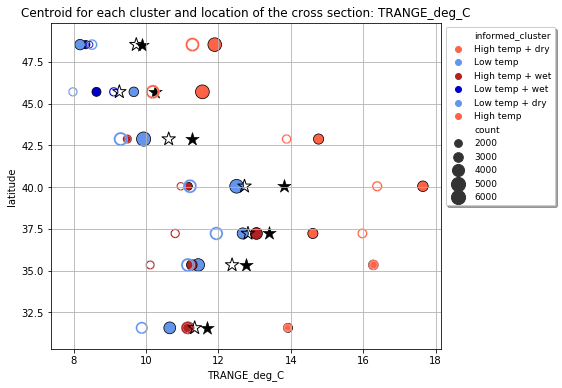

In [41]:
vis.variable_location_scatter_compare('TRANGE_deg_C', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/TRANGE_compare.jpg')

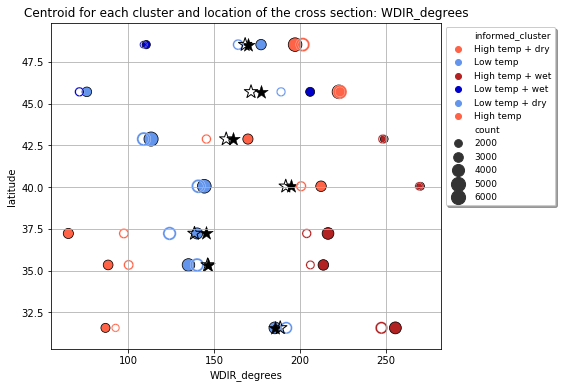

In [42]:
vis.variable_location_scatter_compare('WDIR_degrees', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/WDIR_compare.jpg')

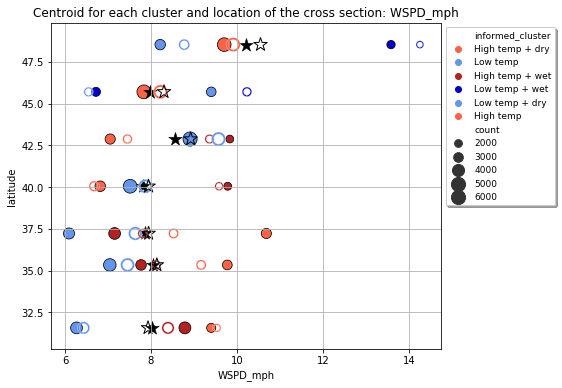

In [43]:
vis.variable_location_scatter_compare('WSPD_mph', pallCentroids, fallCentroids, pmeans, fmeans, save = True, figname = '/glade/u/home/scrandall/production_cluster_plots/WSPD_compare.jpg')